<a href="https://colab.research.google.com/github/Shreya693/Shreya693/blob/main/Deep_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
from sklearn import datasets

In [4]:
# Reusing base code from Perceptron notebook and modifying it
n_pts = 500
X,y = datasets.make_circles(n_samples = n_pts, random_state = 123, noise = 0.1, factor = 0.2)

x_data = torch.Tensor(X)
y_data = torch.Tensor(y.reshape(500,1))

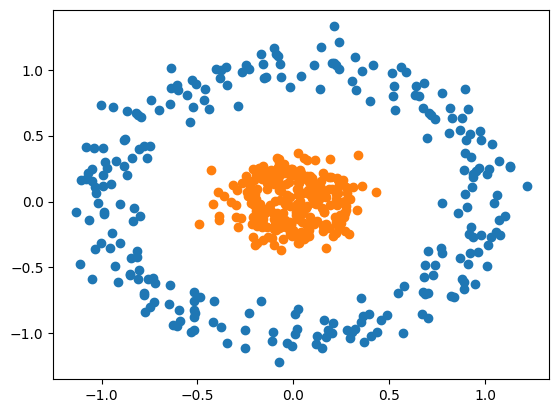

In [5]:
def scatter_plot():
  plt.scatter(X[y == 0, 0], X[y == 0, 1])
  plt.scatter(X[y == 1, 0], X[y == 1, 1])
scatter_plot()

In [6]:
# Model Initializer
class Model(nn.Module):
  def __init__(self, input_size, H1, output_size):
    super().__init__()
    self.linear = nn.Linear(input_size, H1)
    self.linear2 = nn.Linear(H1, output_size)

  def forward(self, x):
    x = torch.sigmoid(self.linear(x))
    x = torch.sigmoid(self.linear2(x))
    return x

  def predict(self,x):
    pred = self.forward(x)
    if pred >= 0.5:
      return 1
    else:
      return 0

In [7]:
torch.manual_seed(2)
model = Model(2,4,1) # creates a linear layer with 2 inputs(input size), 1 hidden layer containing 4 nodes and 1 output.
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.1622, -0.1683],
        [ 0.1939, -0.0361],
        [ 0.3021,  0.1683],
        [-0.0813, -0.5717]], requires_grad=True), Parameter containing:
tensor([ 0.1614, -0.6260,  0.0929,  0.0470], requires_grad=True), Parameter containing:
tensor([[-0.1099,  0.4088,  0.0334,  0.2073]], requires_grad=True), Parameter containing:
tensor([0.2116], requires_grad=True)]


In [12]:
criterion = nn.BCELoss() # BCEloss() functn is apt for binary classification
optimizer = torch.optim.Adam(model.parameters(), lr=0.1) # What is Adam optimisation alg?

In [13]:
epochs = 1000
losses = []

for i in range(epochs):
  y_pred = model.forward(x_data)
  loss = criterion(y_pred, y_data)
  print("epoch:", i, "loss:", loss.item())
  losses.append(loss.item())
  optimizer.zero_grad() # Zero out old gradients
  loss.backward() # Computes gradients -> Figures out how each weight contributed to the mistake.
  optimizer.step()

epoch: 0 loss: 0.03219417855143547
epoch: 1 loss: 0.030535519123077393
epoch: 2 loss: 0.02900421805679798
epoch: 3 loss: 0.02760830707848072
epoch: 4 loss: 0.026248453184962273
epoch: 5 loss: 0.0249705258756876
epoch: 6 loss: 0.023766150698065758
epoch: 7 loss: 0.022605005651712418
epoch: 8 loss: 0.021522510796785355
epoch: 9 loss: 0.020521583035588264
epoch: 10 loss: 0.019575897604227066
epoch: 11 loss: 0.018680928274989128
epoch: 12 loss: 0.017843428999185562
epoch: 13 loss: 0.017055215314030647
epoch: 14 loss: 0.016307074576616287
epoch: 15 loss: 0.015602740459144115
epoch: 16 loss: 0.014944697730243206
epoch: 17 loss: 0.014326502569019794
epoch: 18 loss: 0.013742790557444096
epoch: 19 loss: 0.013193616643548012
epoch: 20 loss: 0.012678000144660473
epoch: 21 loss: 0.012191235087811947
epoch: 22 loss: 0.011729694902896881
epoch: 23 loss: 0.011293425224721432
epoch: 24 loss: 0.010882886126637459
epoch: 25 loss: 0.010496168397367
epoch: 26 loss: 0.010130518116056919
epoch: 27 loss: 0.0

Text(0.5, 0, 'epoch')

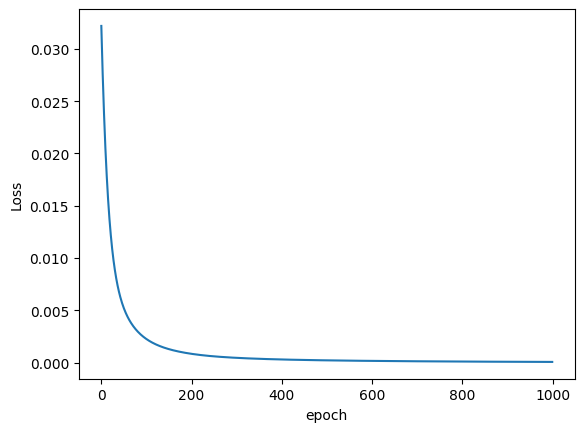

In [14]:
plt.plot(range(epochs),losses)
plt.ylabel('Loss')
plt.xlabel('epoch')

In [34]:
def plot_decision_boundary(X, y):
  x_span = np.linspace(min(X[:, 0]) - 0.25, max(X[:, 0]) + 0.25)
  y_span = np.linspace(min(X[:, 1]) - 0.25, max(X[:, 1]) + 0.25)
  xx, yy = np.meshgrid(x_span, y_span)
  grid = torch.Tensor(np.c_[xx.ravel(), yy.ravel()])
  pred_func = model.forward(grid)
  z = pred_func.view(xx.shape).detach().numpy()
  plt.contourf(xx, yy, z)

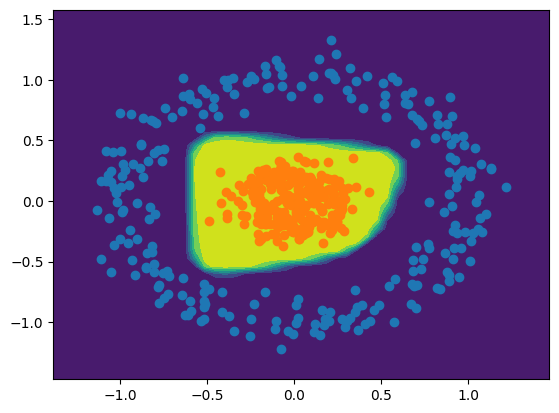

In [35]:
plot_decision_boundary(X, y)
scatter_plot()

Prediction is 1


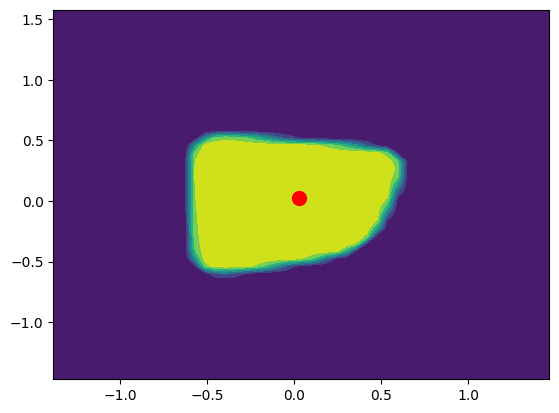

In [37]:
x = 0.025
y = 0.025
point = torch.Tensor([x,y])
prediction = model.predict(point)
plt.plot([x],[y], marker = 'o', markersize = 10, color = "red")
print("Prediction is", prediction)

plot_decision_boundary(X, y)